In [12]:
from matplotlib import pyplot as plt

from datetime import date, timedelta
import seaborn as sns
import pandas as pd
import numpy as np
import rpy2
import sys
import os

sys.path.insert(0, "..")

from global_config import config

data_dir_mnps   = config.get_property('geo_dir')
#data_dir        = config.get_property('data_dir')
data_dir        = config.get_property('covid_fb2')
fb_ppl_data     = config.get_property('covid_fb')
results_dir     = config.get_property('results2_dir')

data_cases_path = os.path.join(fb_ppl_data, 'agglomerated', 'geometry')

# conda install python = 3.11.8

In [13]:
dates_prelockdown = pd.date_range(start = pd.to_datetime("13-07-2020", dayfirst=True) - pd.Timedelta(days=15) - pd.Timedelta(days=1),
                                  end   = pd.to_datetime("13-07-2020", dayfirst=True) - pd.Timedelta(days=1), freq='D')

dates_poslockdown = pd.date_range(start = pd.to_datetime("30-08-2020", dayfirst=True) + pd.Timedelta(days=1),
                                  end   = pd.to_datetime("30-08-2020", dayfirst=True) + pd.Timedelta(days=1)
                                                                                       + pd.Timedelta(days=15), freq='D')
# Del 13 al 26 de julio
dates_lockdown01 = pd.date_range(start = pd.to_datetime("13-07-2020", dayfirst=True),
                                end    = pd.to_datetime("26-07-2020", dayfirst=True), freq='D')
# Del 23 de julio al 6 de agosto
dates_lockdown02 = pd.date_range(start = pd.to_datetime("23-07-2020", dayfirst=True),
                                end    = pd.to_datetime("06-08-2020", dayfirst=True), freq='D')
# Del 31 de julio y al 14 de agosto
dates_lockdown03 = pd.date_range(start = pd.to_datetime("31-07-2020", dayfirst=True),
                                end    = pd.to_datetime("14-08-2020", dayfirst=True), freq='D')
# Del 16 al 30 de agosto
dates_lockdown04 = pd.date_range(start = pd.to_datetime("16-08-2020", dayfirst=True),
                                end    = pd.to_datetime("30-08-2020", dayfirst=True), freq='D')

# 'San Cristóbal', 'Fontibón', 'Engativá', 'Usme', 'Kennedy', 'Bosa', 'Ciudad Bolívar', 'Suba',
#     'Chapinero', 'Antonio Narino', 'Puente Aranda', 'Teusaquillo', 'Usaquén',
#     'Rafael Uribe Uribe', 'Barrios Unidos', 'La Candelaria', 'Santa Fe', 'Los Mártires', 'Tunjuelito'

# Ciudad Bolívar, San Cristóbal, Rafael Uribe Uribe, Chapinero, Santa Fe, Usme, Los Mártires y Tunjuelito
locs_01 = ["Ciudad Bolívar", "San Cristóbal", "Rafael Uribe Uribe", "Chapinero", "Santa Fe", "Usme", "Los Mártires", "Tunjuelito"]
locs_02 = ["Bosa", "Antonio Nariño", "Kennedy", "Puente Aranda", "Fontibón"] # Bosa, Antonio Nariño, Kennedy, Puente Aranda y Fontibón
locs_03 = ["Suba", "Engativá", "Barrios Unidos"] # Suba, Engativá y Barrios Unidos.
locs_04 = ["Usaquén", "Chapinero", "Santa Fe", "La Candelaria", "Teusaquillo", "Puente Aranda", "Antonio Nariño"] # Usaquén, Chapinero, Santa Fe, La Candelaria, Teusaquillo, Puente Aranda y Antonio Nariño.



In [14]:
data_cases_path = os.path.join(data_dir, 'agglomerated', 'geometry')
cases_df        = pd.read_csv(os.path.join(data_cases_path, 'cases.csv'), parse_dates=["date_time"])

dict_correct    = {'Los Martires': 'Los Mártires', 'Fontibon': 'Fontibón', 'Engativa': 'Engativá',
                            'San Cristobal': 'San Cristóbal', 'Usaquen': 'Usaquén',
                            'Ciudad Bolivar': 'Ciudad Bolívar', 'Candelaria': 'La Candelaria'}

cases_df["poly_id"]   = cases_df["poly_id"].apply(lambda s:   s.replace("colombia_bogota_localidad_",""))
cases_df["poly_name"] = cases_df["poly_id"].apply(lambda s:   ' '.join( [word.capitalize() for word in s.replace("colombia_bogota_localidad_","").split('_') ] ) )
cases_df["poly_name"] = cases_df["poly_name"].replace( dict_correct )
cases_df              = cases_df.rename(columns={'poly_id': 'locality_id', 'poly_name': 'locality'})
cases_bog_df          = cases_df.groupby(['locality_id', 'location', 'date_time']).sum()[["num_cases", "num_diseased", "num_infected_in_icu"]]
cases_bog_df          = cases_bog_df.unstack([0,1]).resample('1D').sum().stack().stack().reset_index().rename(columns={'date_time':'date','num_cases': 'confirm',
                                                                                                                'num_diseased': 'deaths',
                                                                                                                'num_infected_in_icu': 'icu'})
cases_bog_df = cases_bog_df.rename(columns={'confirm': 'cases'})
cases_bog_df

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_359/2445276796.py:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  cases_bog_df          = cases_bog_df.unstack([0,1]).resample('1D').sum().stack().stack().reset_index().rename(columns={'date_time':'date','num_cases': 'confirm',
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_359/2445276796.py:13: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  cases_bog_df          = cases_bog_df.unstack([0,1]).resample('1D').sum().stack().stack().reset_index().rename(columns={'date_time':'date','num_cases': 'confirm'

,date,location,locality_id,cases,deaths,icu
0,2020-02-26,20 DE JULIO,san_cristobal,0.0,0.0,0.0
1,2020-02-26,AEROPUERTO EL DORADO,fontibon,0.0,0.0,0.0
2,2020-02-26,ALAMOS,engativa,0.0,0.0,0.0
3,2020-02-26,ALFONSO LOPEZ,usme,0.0,0.0,0.0
4,2020-02-26,AMERICAS,kennedy,0.0,0.0,0.0
...,...,...,...,...,...,...
54629,2021-06-02,USAQUEN,usaquen,0.0,0.0,0.0
54630,2021-06-02,VENECIA,tunjuelito,0.0,0.0,0.0
54631,2021-06-02,VERBENAL,usaquen,0.0,0.0,0.0
54632,2021-06-02,ZONA FRANCA,fontibon,0.0,0.0,0.0


In [15]:
rt_df_all    = []
path_to_save = results_dir

for poly_name in cases_bog_df["locality_id"].unique():
    rt_loc                = pd.read_csv(os.path.join(results_dir, 'rt', 'rt_df_{}_confirmation.csv'.format(poly_name)))
    rt_loc["location_id"] = poly_name
    rt_loc         = rt_loc[rt_loc.type=='estimate']
    rt_loc         = rt_loc[rt_loc.variable=='R']

    rt_loc['date'] = rt_loc['date'].map(lambda x: pd.to_datetime(0)+timedelta(days=x))
    rt_loc         = rt_loc.drop(columns=['Unnamed: 0'])
    rt_df_all.append(rt_loc)
rt_df_all = pd.concat(rt_df_all)


In [17]:
rt_df_all["lockdown_type"] = None

rt_df_all.loc[rt_df_all.date.isin(dates_prelockdown), "lockdown_type"] = "Pre-lockdown"
rt_df_all.loc[rt_df_all.date.isin(dates_lockdown01),  "lockdown_type"] = "1st group"
rt_df_all.loc[rt_df_all.date.isin(dates_lockdown02),  "lockdown_type"] = "2nd group"
rt_df_all.loc[rt_df_all.date.isin(dates_lockdown03),  "lockdown_type"] = "3rd group"
rt_df_all.loc[rt_df_all.date.isin(dates_lockdown04),  "lockdown_type"] = "4th group"
rt_df_all.loc[rt_df_all.date.isin(dates_poslockdown), "lockdown_type"] = "Post-lockdown"


In [ ]:
rt_loc_df = pd.pivot_table(rt_df_all, values='median', index=['date', 'location_id',
                                                                        'lockdown_type'],
                                                                        columns=['variable']).fillna(0).reset_index()

rt_loc_df

variable,date,location_id,lockdown_type,R
0,2020-06-27,antonio_narino,Pre-lockdown,1.051248
1,2020-06-27,barrios_unidos,Pre-lockdown,1.197137
2,2020-06-27,bosa,Pre-lockdown,1.127884
3,2020-06-27,candelaria,Pre-lockdown,0.983202
4,2020-06-27,chapinero,Pre-lockdown,1.174389
...,...,...,...,...
1515,2020-09-15,suba,Post-lockdown,1.146986
1516,2020-09-15,teusaquillo,Post-lockdown,1.186848
1517,2020-09-15,tunjuelito,Post-lockdown,1.001981
1518,2020-09-15,usaquen,Post-lockdown,1.184380


In [19]:

rt_loc_df["location_id"] = rt_loc_df["location_id"].apply(lambda s: ' '.join( [word.capitalize() for word in s.split('_') ] ) )

pre_lockdown_df = rt_loc_df[ rt_loc_df["lockdown_type"] == 'Pre-lockdown' ].sort_values(by=['date'], ascending=True)
A_lockdown_df   = rt_loc_df[ rt_loc_df["lockdown_type"] == '1st group'  ].sort_values(by=['date'], ascending=True)
B_lockdown_df   = rt_loc_df[ rt_loc_df["lockdown_type"] == '2nd group'].sort_values(by=['date'], ascending=True)
C_lockdown_df   = rt_loc_df[ rt_loc_df["lockdown_type"] == '3rd group'].sort_values(by=['date'], ascending=True)
D_lockdown_df   = rt_loc_df[ rt_loc_df["lockdown_type"] == '4th group'].sort_values(by=['date'], ascending=True)
pos_lockdown_df = rt_loc_df[ rt_loc_df["lockdown_type"] == 'Post-lockdown' ].sort_values(by=['date'], ascending=True)


In [20]:
import seaborn as sns

pre_lockdown_df["group"]  = 'Pre-lockdown'
A_lockdown_df["group"]    = '1st Group'
B_lockdown_df["group"]    = '2nd Group'
C_lockdown_df["group"]    = '3rd Group'
D_lockdown_df["group"]    = '4th Group'
pos_lockdown_df["group"]  = 'Pos-lockdown'


box_plot_rt_df = pd.concat([pre_lockdown_df, A_lockdown_df, B_lockdown_df, C_lockdown_df, D_lockdown_df, pos_lockdown_df])
box_plot_rt_df

variable,date,location_id,lockdown_type,R,group
0,2020-06-27,Antonio Narino,Pre-lockdown,1.051248,Pre-lockdown
18,2020-06-27,Usme,Pre-lockdown,1.110589,Pre-lockdown
17,2020-06-27,Usaquen,Pre-lockdown,1.223408,Pre-lockdown
16,2020-06-27,Tunjuelito,Pre-lockdown,1.166563,Pre-lockdown
15,2020-06-27,Teusaquillo,Pre-lockdown,1.165241,Pre-lockdown
...,...,...,...,...,...
1502,2020-09-15,Barrios Unidos,Post-lockdown,1.002978,Pos-lockdown
1501,2020-09-15,Antonio Narino,Post-lockdown,0.963385,Pos-lockdown
1518,2020-09-15,Usaquen,Post-lockdown,1.184380,Pos-lockdown
1509,2020-09-15,Kennedy,Post-lockdown,0.967673,Pos-lockdown


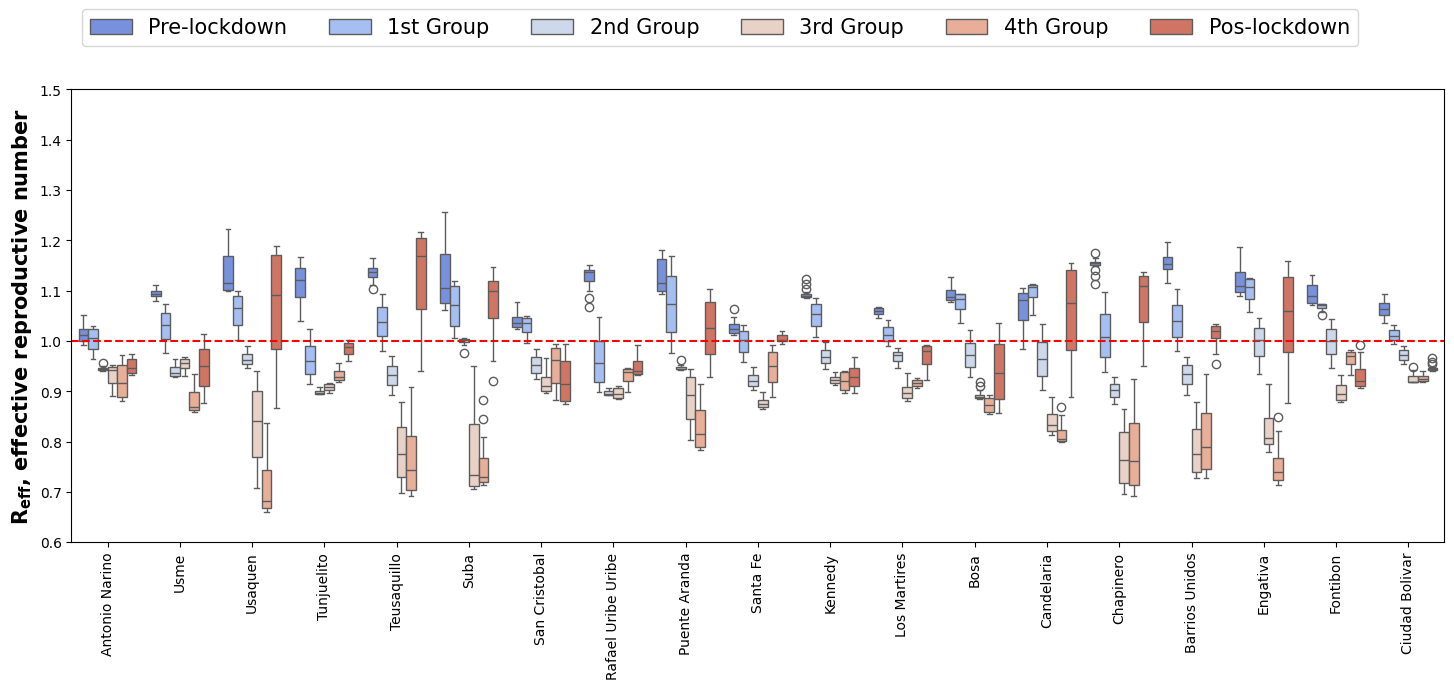

In [21]:
fig, ax = plt.subplots(1,1,figsize=(15.5, 7.2))
# Draw a nested boxplot to show bills by day and time
sns.boxplot(ax=ax, data=box_plot_rt_df, x="location_id", y="R", hue="group", palette='coolwarm')

ax.set_ylabel(r'$\mathbf{R_{eff}}$, effective reproductive number', fontsize=15, weight='bold')
ax.axhline(y=1, color='red', linestyle='--')
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylim([0.6, 1.5])
ax.legend(fontsize=15, loc='upper left', bbox_to_anchor=(0, 1.2), ncol=6)
ax.set_xlabel(None)
plt.tight_layout()

/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_359/536646494.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  box_i_df["location_id"].replace({"Rafael Uribe Uribe": "Rafael Uribe"}, inplace=True)
/var/folders/20/x0sn0k_10hqfn739thwg8lxw0000gn/T/ipykernel_359/536646494.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_i_d

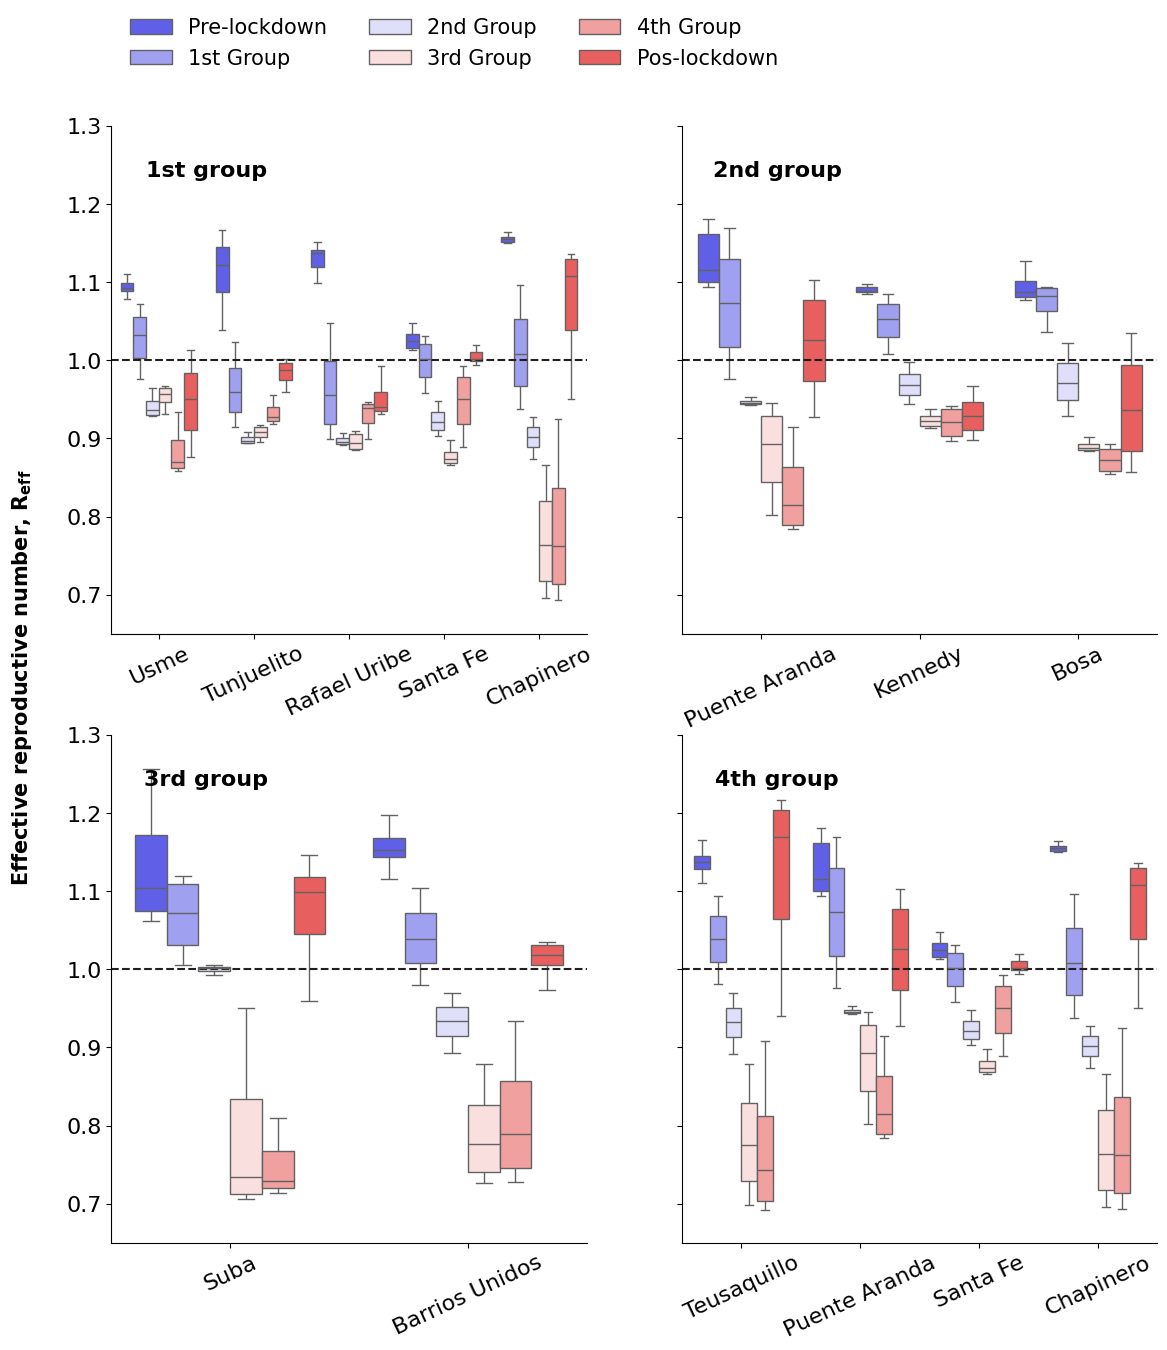

In [49]:
from utils.plot_utils import *

palette_grays = ["#231D1F", "#939597"]

# Ciudad Bolívar, San Cristóbal, Rafael Uribe Uribe, Chapinero, Santa Fe, Usme, Los Mártires y Tunjuelito
locs_01 = ["Ciudad Bolívar", "San Cristóbal", "Rafael Uribe Uribe", "Chapinero",
                                "Santa Fe", "Usme", "Los Mártires", "Tunjuelito"]
# Bosa, Antonio Nariño, Kennedy, Puente Aranda y Fontibón
locs_02 = ["Bosa", "Antonio Nariño", "Kennedy", "Puente Aranda", "Fontibón"]
# Suba, Engativá y Barrios Unidos.
locs_03 = ["Suba", "Engativá", "Barrios Unidos"]
# Usaquén, Chapinero, Santa Fe, La Candelaria, Teusaquillo, Puente Aranda y Antonio Nariño.
locs_04 = ["Usaquén", "Chapinero", "Santa Fe", "La Candelaria",
                    "Teusaquillo", "Puente Aranda", "Antonio Nariño"]

locs_plot = [locs_01, locs_02, locs_03, locs_04]


fig, ax = plt.subplots(2, 2, figsize=(13.5, 14.5), sharex=False, sharey=True)

for i_axi, axi in enumerate(ax.flatten()):
    loc_i = locs_plot[i_axi]

    box_i_df = box_plot_rt_df[box_plot_rt_df.location_id.isin(loc_i)]
    box_i_df["location_id"].replace({"Rafael Uribe Uribe": "Rafael Uribe"}, inplace=True)

    # Draw a nested boxplot to show bills by day and time
    sns.boxplot(ax=axi, data=box_i_df, x="location_id", y="R", hue="group", palette='bwr', showfliers=False)
    axi.tick_params(axis='x', labelrotation=25)
    axi.axhline(y=1, color=palette_grays[0], linestyle='--')
    axi.set_ylim([0.65, 1.3])

    if i_axi > 0:
        axi.legend().remove()

    axi.set_xlabel(None)
    axi.set_ylabel(None)

    axi.spines['right'].set_visible(False)
    axi.spines['top'].set_visible(False)


ax[0, 0].text(x=0.2, y=0.9, s='1st group', weight='bold', ha='center', transform=ax[0, 0].transAxes)
ax[0, 1].text(x=0.2, y=0.9, s='2nd group', weight='bold', ha='center', transform=ax[0, 1].transAxes)
ax[1, 0].text(x=0.2, y=0.9, s='3rd group', weight='bold', ha='center', transform=ax[1, 0].transAxes)
ax[1, 1].text(x=0.2, y=0.9, s='4th group', weight='bold', ha='center', transform=ax[1, 1].transAxes)

ax[0, 0].legend(fontsize=15, loc='upper left', bbox_to_anchor=(-0.0, 1.25), ncol=3, frameon=False)
fig.supylabel(r'Effective reproductive number, $\mathbf{R_{eff}}$', fontsize=15, weight='bold', x=0.05)

fig.savefig(os.path.join('figures',  'Fig3_Reff_changes.png'), dpi=300, bbox_inches='tight')